# Figure 5 - land cover influence

This notebook explores the relationship between land cover, biophony, and the sound exposure level (SEL).

#### import statements

In [1]:
import pandas
import numpy
from matplotlib import pyplot
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
%matplotlib inline

from figutils import style

#### formatting

In [2]:
style.set_font()

#### data sources

acoustic and land cover values

In [3]:
data = pandas.read_csv(r"C:\Users\JDDein\OneDrive\Documents\alpine soundscapes\data\dataset_r.csv")
data = data[data.site <= 30]
values_1280m = data[['site', 'd2n_1280m', 'sel', 'biophony']].groupby('site').mean()
values_1280m.sort_values(by=['d2n_1280m'], inplace=True)
values_40m = data[['site', 'd2n_40m', 'sel', 'biophony']].groupby('site').mean()
values_40m.sort_values(by=['d2n_40m'], inplace=True)

In [4]:
#values = values_1280m.join(values_40m['d2n_40m'])
values = values_40m.join(values_1280m['d2n_1280m'])

In [5]:
values

,d2n_40m,sel,biophony,d2n_1280m
site,,,,
17,0.000000,-57.243305,6.524789,0.016097
10,0.000000,-54.094381,3.074771,0.116858
9,0.000036,-58.585342,4.636931,0.158809
11,0.000459,-54.279682,0.599831,0.111913
30,0.000522,-53.098433,2.492976,0.077278
1,0.002119,-56.994055,3.412908,0.111913
13,0.004716,-48.587814,2.866649,0.275123
23,0.008769,-55.466703,4.052260,0.030461
2,0.012748,-46.968052,1.393346,0.159539


land cover percent areas

In [6]:
landcover = pandas.read_csv(r"C:\Users\JDDein\OneDrive\Documents\alpine soundscapes\data\landcover\landcover_areas_r.csv")
landcover = landcover[landcover.IncludedArea == '1280m']
landcover = landcover[landcover.SiteID <= 30]
landcover.set_index('SiteID', drop='False', inplace=True)
landcover.sort_index(inplace=True)

In [7]:
landcover

,IncludedArea,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
SiteID,,,,,,,,,,,,,,,,
1,1280m,3.6856,4.8219,1.5904,0.0276,0.0000,0.8878,0,0,41.7860,2.3792,0.0000,44.8214,0,0,0
2,1280m,1.0977,5.9819,5.6127,0.5720,17.6687,3.5537,0,0,41.1033,0.3870,0.0000,24.0231,0,0,0
3,1280m,12.0353,18.9812,0.6476,0.2446,0.0017,3.3569,0,0,26.8255,5.7574,0.0000,32.1497,0,0,0
4,1280m,4.9268,8.3144,0.6763,0.2662,0.8622,0.9379,0,0,63.9709,0.9974,0.0000,19.0479,0,0,0
5,1280m,27.6338,37.3487,1.1167,0.0000,0.0000,0.9752,0,0,14.2303,1.8403,0.0000,16.8550,0,0,0
6,1280m,6.5390,13.5906,1.4798,0.0156,0.0114,3.1934,0,0,33.1077,5.4318,0.0000,36.6308,0,0,0
7,1280m,15.6241,19.6741,0.6536,0.0000,0.0000,0.0562,0,0,35.8736,2.3074,0.0000,25.8109,0,0,0
8,1280m,4.3051,9.6476,0.0770,1.0567,0.0000,0.7699,0,0,45.9696,1.7756,0.0000,36.3987,0,0,0
9,1280m,4.0112,7.9480,1.3130,0.0252,0.0000,0.8928,0,0,45.1972,4.1107,0.0000,36.5019,0,0,0


In [8]:
represented_colors = [1, 2, 3, 4, 5, 6, 9, 10, 11, 12]

land cover colors and site names

In [9]:
colors = pandas.read_csv(r"C:\Users\JDDein\OneDrive\Documents\alpine soundscapes\data\landcover\landcover_types.csv").set_index('ID')
colors['Name Abv.'] = ['buildings', 'other\nconst.\nareas', 'bare\nsoil', 'scree',
       'bare\nrock', 'surface\nwater', 'snow', 'ice', 'trees', 'bushes',
       'dwarf\nshrubs', 'herb.\nveg.', 'reeds', 'shadows',
       'clouds']
site_names = data.sort_values(by='site').site_name.unique()

join land cover areas with the data

In [10]:
landcover_1280m = values_1280m.join(landcover)

In [11]:
landcover_all = values.join(landcover, rsuffix='_1280m')

land cover percent areas

In [12]:
landcover = pandas.read_csv(r"C:\Users\JDDein\OneDrive\Documents\alpine soundscapes\data\landcover\landcover_areas_r.csv")
landcover = landcover[landcover.IncludedArea == '40m']
landcover = landcover[landcover.SiteID <= 30]
landcover.set_index('SiteID', drop='False', inplace=True)
landcover.sort_index(inplace=True)

join land cover areas with the data

In [13]:
landcover_40m = values_40m.join(landcover)

In [14]:
landcover_all = landcover_all.join(landcover_40m, rsuffix='_40m')

#### plot

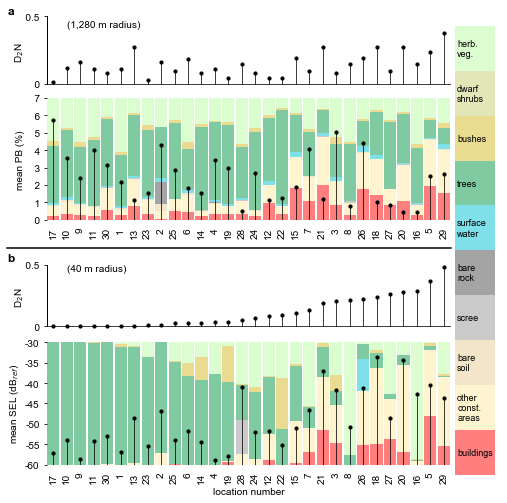

In [15]:
figure = pyplot.figure()
figure.subplots_adjust(left=0.08, bottom=0.05, right=0.99, top=0.98, wspace=0, hspace=0)

figure.set_figheight(6.85)
figure.set_figwidth(6.85)

ax_a = pyplot.subplot2grid((45, 10), (0, 0), rowspan=7, colspan=9)
ax_b = pyplot.subplot2grid((45, 10), (8, 0), rowspan=12, colspan=9, sharex=ax_a)
ax_d = pyplot.subplot2grid((45, 10), (24, 0), rowspan=7, colspan=9)
ax_c = pyplot.subplot2grid((45, 10), (32, 0), rowspan=12, colspan=9, sharex=ax_d)
ax_e = pyplot.subplot2grid((45, 10), (0, 9), rowspan=45, colspan=1)

ID = numpy.array([ n for n in range(len(landcover_all)) ])
xticks = ID + 0.5

#-------------Legend-------------
ax_e.set_frame_on(False)
ax_e.tick_params(axis='both', 
                 bottom=False, right=False, top=False, left=False,
                 labelbottom=False, labelleft=False, direction='in')
bottom = 0.05
for n in represented_colors:
    #height = 0.93/len(represented_colors)
    height = 0.091
    r = Rectangle((0.9075, bottom), 0.091, height, 
                  color=colors.loc[n]['Color'], alpha=0.5, edgecolor=None, linewidth=0,
                  transform=figure.transFigure)
    ax_e.add_patch(r)
    y = bottom + (height/2)
    ax_e.text(0.9125, y, colors.loc[n]['Name Abv.'], color='black',
              rotation=0, transform=figure.transFigure, 
              ha='left', va='center', fontsize=9)
    bottom = bottom + height
#colors.loc[n]['Name']
    
#-------------D2N-------------
ax_a.scatter(xticks, values.d2n_1280m, c='black', s=10)
for n, i in enumerate(landcover_all.index):
    ax_a.add_line(Line2D([xticks[n], xticks[n]], [values.d2n_1280m[i], 0], color='black', linewidth=0.75))
ax_a.set_frame_on(False)

ax_a.tick_params(axis='both', 
                 bottom=False, right=False, top=False, left=True,
                 labelbottom=False, labelleft=True, direction='out')

ax_a.add_line(Line2D([0, len(landcover_all)], [0, 0], color='black', linewidth=0.75))

ax_a.set_yticks([0, 0.5])
ax_a.set_yticklabels(['  0', '  0.5'])
ax_a.set_ylabel('D' + r'$_2$' + 'N')
ax_a.yaxis.set_label_coords(-0.05, 0.5)

ax_a.add_line(ax_a.add_line(Line2D([0, 0], [0, 0.5], color='black', linewidth=1)))

#-------------D2N-------------
ax_d.scatter(xticks, values.d2n_40m, c='black', s=10)
for n, i in enumerate(landcover_all.index):
    ax_d.add_line(Line2D([xticks[n], xticks[n]], [values.d2n_40m[i], 0], color='black', linewidth=0.75))
ax_d.set_frame_on(False)

ax_d.tick_params(axis='both', 
                 bottom=False, right=False, top=False, left=True,
                 labelbottom=False, labelleft=True, direction='out')

ax_d.add_line(Line2D([0, len(landcover_all)], [0, 0], color='black', linewidth=0.75))

ax_d.set_yticks([0, 0.5])
ax_d.set_yticklabels(['  0', '  0.5'])
ax_d.set_ylabel('D' + r'$_2$' + 'N')
ax_d.yaxis.set_label_coords(-0.05, 0.5)

ax_d.add_line(ax_d.add_line(Line2D([0, 0], [0, 0.5], color='black', linewidth=1)))

#-------------biophony-------------
bar_width = 0.9
SiteIDs = values.index
left = ID + 0.5
height = numpy.zeros(len(landcover_all))
bottom = numpy.zeros(len(landcover_all))
for index, column in landcover_all.loc[:,'1':'15'].iteritems():
    height = column.values
    ax_b.bar(x=left, 
            height=height, 
            bottom=bottom,
            width=bar_width,
            color=colors['Color'][int(index)],
            edgecolor=None,
            linewidth=0,
            alpha=0.5)
    bottom = bottom + height

# format
ax_b.set_xlim(0, 30)
ax_b.set_ylim(0, 100)
ax_b.set_ylabel('mean PB (%)')
xticklabels = [site_names[n - 1] for n in SiteIDs]
xticklabels = [ "{0}".format(SiteIDs[i]) for i in ID ]
t = ax_b.set_xticks(xticks)
tl = ax_b.set_xticklabels(xticklabels, rotation='vertical')
ax_b.set_frame_on(False)

# title formatting
title_font = {
    'size': 12.0,
    'weight': 'bold'
}

# formatting
ax_b.tick_params(axis='both', 
                 bottom=False, right=False, top=False, left=True,
                 labelbottom=True, labelleft=True, direction='out')

y = values_1280m['biophony']
ymin = numpy.around(y.min() - 1)
y_zeroed = y - ymin
ymax = numpy.around(y_zeroed.max() + 1)
y_trans = (y_zeroed / ymax) * 100

yticks = numpy.arange(ymin, numpy.around(y.max() + 5, decimals=-1) + 5, 5)
yticks_trans = [((n - yticks.min()) /  (yticks.max() - yticks.min())) * 100 for n in yticks]
yticklabels = ["{0:.0f}".format(n) for n in yticks]
t = ax_b.set_yticks(yticks_trans)
tl = ax_b.set_yticklabels(yticklabels)

ax_b.scatter(numpy.arange(0, 30, 1) + 0.5, y_trans, c='black', zorder=2, s=10)
for n, i in enumerate(landcover_1280m.index):
    ax_b.add_line(Line2D([xticks[n], xticks[n]], [min(yticks_trans), y_trans[i]], color='black', linewidth=0.75))
    
yticks = numpy.arange(ymin, numpy.around(y.max()) + 1, 1)
yticks_trans = [((n - yticks.min()) /  (yticks.max() - yticks.min())) * 100 for n in yticks]
yticklabels = ["  {0:.0f}".format(abs(n)) for n in yticks]
t = ax_b.set_yticks(yticks_trans)
tl = ax_b.set_yticklabels(yticklabels)


#-------------SEL-------------
bar_width = 0.9
SiteIDs = values.index
left = ID + 0.5
height = numpy.zeros(len(landcover_all))
bottom = numpy.zeros(len(landcover_all))
for index, column in landcover_all.loc[:,'1_40m':'15_40m'].iteritems():
    height = column.values
    ax_c.bar(x=left, 
            height=height, 
            bottom=bottom,
            width=bar_width,
            color=colors['Color'][int(index.split('_')[0])],
            edgecolor=None,
            linewidth=0,
            alpha=0.5)
    bottom = bottom + height

# format
ax_c.set_xlim(0, 30)
ax_c.set_ylim(0, 100)
ax_c.set_xlabel('location number')
ax_c.set_ylabel('mean SEL (dB' + r'$_{ref}$' + ')')
xticklabels = [site_names[n - 1] for n in SiteIDs]
xticklabels = [ "{0}".format(SiteIDs[i]) for i in ID ]
t = ax_c.set_xticks(xticks)
tl = ax_c.set_xticklabels(xticklabels, rotation='vertical')
ax_c.set_frame_on(False)

# formatting
ax_c.tick_params(axis='both', 
                 bottom=False, right=False, top=False, left=True,
                 labelbottom=True, labelleft=True, direction='out')

y = values['sel']
ymin = numpy.around(y.min() - 5, decimals=-1)
y_zeroed = y - ymin
ymax = numpy.around(y_zeroed.max() + 5, decimals=-1)
y_trans = (y_zeroed / ymax) * 100

yticks = numpy.arange(ymin, numpy.around(y.max() + 5, decimals=-1) + 5, 5)
yticks_trans = [((n - yticks.min()) /  (yticks.max() - yticks.min())) * 100 for n in yticks]
yticklabels = ["{0:.0f}".format(n) for n in yticks]
t = ax_c.set_yticks(yticks_trans)
tl = ax_c.set_yticklabels(yticklabels)

ax_c.scatter(numpy.arange(0, 30, 1) + 0.5, y_trans, c='black', zorder=2, s=10)
for n, i in enumerate(landcover_all.index):
    ax_c.add_line(Line2D([xticks[n], xticks[n]], [min(yticks_trans), y_trans[i]], color='black', linewidth=0.75))

# title formatting
title_font = {
    'size': 12.0,
    'weight': 'bold'
}
ax_a2 = pyplot.axes([0, 0.975, 1, 0.025], facecolor=(1, 1, 1, 0), frameon=False)
ax_a2.tick_params(bottom=False, labelbottom=False,
                 top=False, labeltop=False,
                 left=False, labelleft=False,
                 right=False, labelright=False)
ax_b2 = pyplot.axes([0, 0.475, 1, 0.025], facecolor=(1, 1, 1, 0), frameon=False)
ax_b2.tick_params(bottom=False, labelbottom=False,
                 top=False, labeltop=False,
                 left=False, labelleft=False,
                 right=False, labelright=False)

t1 = ax_a2.text(0, 1, 'a', horizontalalignment='left', verticalalignment='top', 
          fontdict=title_font)
t2 = ax_b2.text(0, 1, 'b', horizontalalignment='left', verticalalignment='top', 
          fontdict=title_font)
figure.lines.extend([Line2D([0, 0.9], [0.51, 0.51], 
                            color='black',
                            transform=figure.transFigure, 
                            figure=figure)])

t0 = ax_a.text(0.05, 0.95, '(1,280 m radius)', horizontalalignment='left', verticalalignment='top', transform=ax_a.transAxes)
t0 = ax_d.text(0.05, 0.95, '(40 m radius)', horizontalalignment='left', verticalalignment='top', transform=ax_d.transAxes)

#figure.lines.extend([Line2D([0.9025, 0.9025], [0.05, 0.98], 
#                            color='black',
#                            transform=figure.transFigure, 
#                            figure=figure)])

#### save figure

In [16]:
figure.savefig(r"C:\Users\JDDein\Desktop\LC_site_lr.png", dpi=1200)